In [1]:
import pandas as pd
import numpy as np

# 전처리 완료 데이터 불러오기
data_a = pd.read_csv("./datasets/data_after/전처리_최종_V3_loglag.csv", encoding="CP949")
data_a = data_a.set_index('기준월')

### 기초통계량 분석

In [2]:
# 데이터프레임의 정보
data_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 2004-07 to 2022-06
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   만기전상환율       214 non-null    float64
 1   가중평균발행금리     214 non-null    float64
 2   주택종합 매매가격지수  214 non-null    float64
 3   주택종합 전세가격지수  214 non-null    float64
 4   소비자물가지수      214 non-null    float64
 5   15-64 실업자 수  214 non-null    float64
 6   코스피 월별 종가    214 non-null    float64
 7   예금은행 대출금리    214 non-null    float64
 8   평균 LTV       214 non-null    float64
 9   평균 DTI       214 non-null    float64
 10  CD금리         214 non-null    float64
 11  인플레이션율       214 non-null    float64
dtypes: float64(12)
memory usage: 21.7+ KB


In [3]:
# 결측치 확인
data_a.isna().sum()

만기전상환율         0
가중평균발행금리       0
주택종합 매매가격지수    0
주택종합 전세가격지수    0
소비자물가지수        0
15-64 실업자 수    0
코스피 월별 종가      0
예금은행 대출금리      0
평균 LTV         0
평균 DTI         0
CD금리           0
인플레이션율         0
dtype: int64

In [4]:
# 기초 통계 조회
data_a.describe()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,인플레이션율
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2.125790,3.773027,70.835033,72.083953,4.496383,6.771244,7.513644,1.415123,59.874064,32.485376,0.866499,0.189481
std,1.295680,0.954468,11.059051,15.072584,0.106253,0.131812,0.288032,0.314779,1.158292,1.313916,0.542269,0.352278
min,0.037500,2.447768,51.567000,49.086000,4.278318,6.527958,6.600333,0.871293,57.812187,29.270000,-0.462035,-0.744313
25%,1.236738,2.869294,63.628000,56.417250,4.414212,6.677712,7.395603,1.152934,59.055704,31.498212,0.490109,-0.067598
50%,1.748847,3.411875,70.716000,73.672000,4.531157,6.748760,7.583812,1.360977,59.968668,32.773154,0.974560,0.179601
75%,2.753005,4.801858,77.204250,85.564000,4.584640,6.856462,7.652164,1.695616,60.562161,33.592059,1.264127,0.404551
max,9.681872,5.236765,100.768000,100.814000,4.678049,7.078342,8.100671,2.025513,62.019524,34.461733,1.796747,1.188525


In [5]:
# 아주 간단하게 상관관계 분석
data_a.corr()

,만기전상환율,가중평균발행금리,주택종합 매매가격지수,주택종합 전세가격지수,소비자물가지수,15-64 실업자 수,코스피 월별 종가,예금은행 대출금리,평균 LTV,평균 DTI,CD금리,인플레이션율
만기전상환율,1.000000,-0.212187,0.071402,0.212557,0.265383,0.091006,0.221319,-0.333767,-0.471657,0.328658,-0.120067,-0.206792
가중평균발행금리,-0.212187,1.000000,-0.859188,-0.960978,-0.905004,-0.408910,-0.737516,0.945414,0.087004,0.622796,0.877357,0.126407
주택종합 매매가격지수,0.071402,-0.859188,1.000000,0.950540,0.935405,0.224822,0.863680,-0.750758,-0.152847,-0.665767,-0.807315,0.008612
주택종합 전세가격지수,0.212557,-0.960978,0.950540,1.000000,0.966397,0.332931,0.842150,-0.882945,-0.166292,-0.623201,-0.852136,-0.076446
소비자물가지수,0.265383,-0.905004,0.935405,0.966397,1.000000,0.327146,0.871575,-0.843832,-0.359738,-0.501414,-0.809405,-0.101928
15-64 실업자 수,0.091006,-0.408910,0.224822,0.332931,0.327146,1.000000,0.187947,-0.489313,0.009945,-0.334774,-0.488598,-0.106716
코스피 월별 종가,0.221319,-0.737516,0.863680,0.842150,0.871575,0.187947,1.000000,-0.656381,-0.295453,-0.482773,-0.658527,0.010419
예금은행 대출금리,-0.333767,0.945414,-0.750758,-0.882945,-0.843832,-0.489313,-0.656381,1.000000,0.104470,0.583704,0.902146,0.169978
평균 LTV,-0.471657,0.087004,-0.152847,-0.166292,-0.359738,0.009945,-0.295453,0.104470,1.000000,-0.435826,0.068336,0.059523
평균 DTI,0.328658,0.622796,-0.665767,-0.623201,-0.501414,-0.334774,-0.482773,0.583704,-0.435826,1.000000,0.704716,-0.060283


### 상관관계 히트맵으로 시각화

c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\subin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


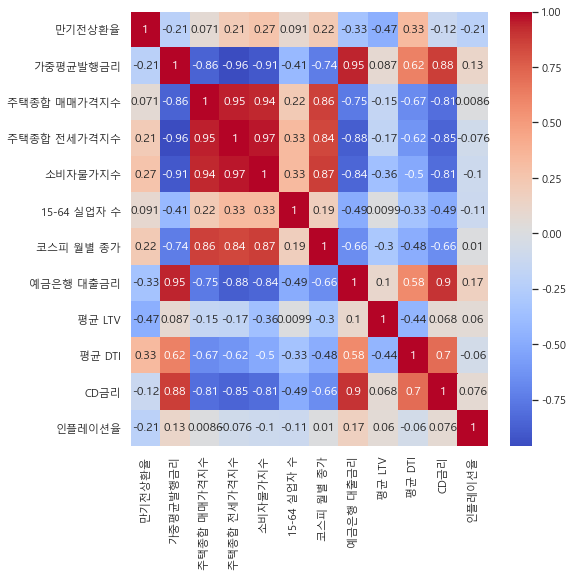

In [6]:
# 히트맵을 위한 라이브러리 호출
import matplotlib.pyplot as plt
import seaborn as sns

# 히트맵 드로잉
sns.set(rc={'figure.figsize':(8,8)}) ## 히트맵 크기 설정
plt.rc('font', family='Malgun Gothic') ## 한글 깨짐 설정
sns.heatmap(data_a.corr(), annot=True, cmap='coolwarm') ## 히트맵 그리기
plt.rcParams['axes.unicode_minus'] = False ## 마이너스 부호 깨지는 걸 방지함
plt.show()

In [7]:
# VIF 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_a.values, i) for i in range(data_a.shape[1])]
vif["features"] = data_a.columns

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,30628.069972,소비자물가지수
1,4722.475963,15-64 실업자 수
2,4418.549587,평균 DTI
3,3710.678880,코스피 월별 종가
4,2894.363005,평균 LTV
5,2403.522024,주택종합 전세가격지수
6,1650.702731,주택종합 매매가격지수
7,842.644520,가중평균발행금리
8,632.880134,예금은행 대출금리
9,37.270199,CD금리


### 현재 상관관계가 굉장히 높은 것들 (> |0.7|)
1. 가중평균발행금리 & 금리의 차이
2. 주택종합 매매가격지수 & 주택종합 전세가격지수
3. 소비자 물가지수 & 주택종합 매매가격지수
4. 소비자 물가지수 & 주택종합 전세가격지수
5. 코스피 월별종가 & 주택종합 매매가격지수
6. 코스피 월별종가 & 주택종합 전세가격지수

In [8]:
# # 히트맵을 보고 컬럼에서 상관관계가 높다고 생각된 컬럼들 선정해서 빼기
# data_b = data_a.copy()
# data_b.drop(columns=['예금은행 대출금리', '주택종합 전세가격지수'], inplace=True)

# # 상관관계 재확인
# sns.set(rc={'figure.figsize':(8,8)}) ## 히트맵 크기 설정
# plt.rc('font', family='Malgun Gothic') ## 한글 깨짐 설정
# sns.heatmap(data_b.corr(), annot=True, cmap='coolwarm') ## 히트맵 그리기
# plt.rcParams['axes.unicode_minus'] = False ## 마이너스 부호 깨지는 걸 방지함
# plt.show()

### Scaling
- Standard : 데이터를 표준정규분포 모양으로 만듬 -> 데이터 특성을 반영 못 하니까 못 씀
- Robuster : 아웃라이어를 없애버림 -> 막판에 만기전상환율이 튀는 걸 살리는 게 맞는 것 같음 -> 못 씀
- Min-Max : 아웃라이어 살리고 데이터 분포 살림 (-> 남는 게 이거 뿐)

In [ ]:
# Min - Max Scaler
from sklearn.preprocessing import MinMaxScaler

data_c = data_a.copy().reset_index()
scaler = MinMaxScaler()
mm_temp = data_c.drop(columns=['기준월','만기전상환율'])
colnames = data_c.columns.drop(['기준월','만기전상환율'])

mm_data = scaler.fit_transform(mm_temp)

mm_result = pd.DataFrame(mm_data, columns=colnames)
mm_result

In [ ]:
# Min-Max 스케일링 잘 됐는지 확인
mm_result.describe()

#### 변수 각각 분석

In [11]:
# 최적의 알파값을 찾기 전에 피처랑 타겟 설정
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

## ALL
feature_data = mm_result

## 금리 요인 
feature_data_A = mm_result[['가중평균발행금리', '예금은행 대출금리', 'CD금리']]

## 부동산 요인
feature_data_B = mm_result[['주택종합 매매가격지수', '평균 LTV', '평균 DTI']]

## 거시경제 요인
feature_data_C = mm_result[['15-64 실업자 수', '인플레이션율', '코스피 월별 종가']]

target = data_a['만기전상환율']

## 주요 요인 별로 나눈 이유 -> 각 상관관계가 너무 높아서

In [ ]:
# 각 변수 요인들 끼리만
## GridSearchCV 수행하는 함수를 담은 패키지 로드
from test_package import find_best_alpha

## find_best_alpha(type, data, target)
## type : ridge, lasso, elastic

find_best_alpha('ridge', feature_data[:161], target[:161])
find_best_alpha('ridge', feature_data_A[:161], target[:161])
find_best_alpha('ridge', feature_data_B[:161], target[:161])
find_best_alpha('ridge', feature_data_C[:161], target[:161])

find_best_alpha('lasso', feature_data[:161], target[:161])
find_best_alpha('lasso', feature_data_A[:161], target[:161])
find_best_alpha('lasso', feature_data_B[:161], target[:161])
find_best_alpha('lasso', feature_data_C[:161], target[:161])

find_best_alpha('elastic', feature_data[:161], target[:161])
find_best_alpha('elastic', feature_data_A[:161], target[:161])
find_best_alpha('elastic', feature_data_B[:161], target[:161])
find_best_alpha('elastic', feature_data_C[:161], target[:161])

# 각 변수 요인들 끼리만
### Type : ridge | {'alpha': 1.0} | MSE : 0.2874325085464655 | RMSE: 0.5361273249392028
### Type : ridge | {'alpha': 1.0} | MSE : 0.4843211261090438 | RMSE: 0.6959318401316639
### Type : ridge | {'alpha': 1.0} | MSE : 2.303702039188056 | RMSE: 1.5177951242470296
### Type : ridge | {'alpha': 0.24} | MSE : 1.8011650392986471 | RMSE: 1.3420749007781374
###------------------------------------------------------------------------------------------

### Type : lasso | {'alpha': 0.01} | MSE : 0.09763323766117012 | RMSE: 0.3124631780885071
### Type : lasso | {'alpha': 0.02} | MSE : 0.36534151073556403 | RMSE: 0.6044348688945436
### Type : lasso | {'alpha': 0.04} | MSE : 2.0607099217398903 | RMSE: 1.4355173010938915
### Type : lasso | {'alpha': 0.01} | MSE : 1.9356329844828863 | RMSE: 1.3912702772944179
###------------------------------------------------------------------------------------------

### Type : elastic | {'alpha': 0.01} | MSE : 0.058333389447388174 | RMSE: 0.24152306193692596
### Type : elastic | {'alpha': 0.01} | MSE : 0.450128142753749 | RMSE: 0.67091589842077
### Type : elastic | {'alpha': 0.02} | MSE : 2.253402311844675 | RMSE: 1.5011336755414806
### Type : elastic | {'alpha': 0.01} | MSE : 1.9762840605631233 | RMSE: 1.4058037062702329
###------------------------------------------------------------------------------------------


In [ ]:
# 전체 VIF after Min-Max Scaling
vif_x = pd.DataFrame()
vif_x["VIF Factor"] = [variance_inflation_factor(feature_data.values, i) for i in range(feature_data.shape[1])]
vif_x["features"] = feature_data.columns

vif_x = vif_x.sort_values(by="VIF Factor", ascending=False)
vif_x = vif_x.reset_index().drop(columns='index')
vif_x

In [ ]:
# 금리 요인 VIF after Min-Max Scaling
vif_a = pd.DataFrame()
vif_a["VIF Factor"] = [variance_inflation_factor(feature_data_A.values, i) for i in range(feature_data_A.shape[1])]
vif_a["features"] = feature_data_A.columns

vif_a = vif_a.sort_values(by="VIF Factor", ascending=False)
vif_a = vif_a.reset_index().drop(columns='index')
vif_a

In [ ]:
# 부동산 요인 VIF after Min-Max Scaling
vif_b = pd.DataFrame()
vif_b["VIF Factor"] = [variance_inflation_factor(feature_data_B.values, i) for i in range(feature_data_B.shape[1])]
vif_b["features"] = feature_data_B.columns

vif_b = vif_b.sort_values(by="VIF Factor", ascending=False)
vif_b = vif_b.reset_index().drop(columns='index')
vif_b

In [ ]:
# 거시경제 요인 VIF after Min-Max Scaling
vif_c = pd.DataFrame()
vif_c["VIF Factor"] = [variance_inflation_factor(feature_data_C.values, i) for i in range(feature_data_C.shape[1])]
vif_c["features"] = feature_data_C.columns

vif_c = vif_c.sort_values(by="VIF Factor", ascending=False)
vif_c = vif_c.reset_index().drop(columns='index')
vif_c

#### 변수 합쳐서 분석

In [16]:
# 최적의 알파값을 찾기 전에 피처링 타겟 설정
mm_result2 = mm_result.copy()

## ALL
feature_data2 = mm_result2

## 금리 요인 
feature_data2_A = mm_result2[['가중평균발행금리', '예금은행 대출금리']]

## 금리 요인 + 부동산 요인
feature_data2_B = mm_result2[['가중평균발행금리', '예금은행 대출금리', '주택종합 매매가격지수', '평균 LTV', '평균 DTI']]

## 금리 요인 + 부동산 요인 + 거시경제 요인
feature_data2_C = mm_result2[['가중평균발행금리', '예금은행 대출금리', '주택종합 매매가격지수', '평균 LTV', '평균 DTI', '15-64 실업자 수', '인플레이션율', '코스피 월별 종가']]

target = data_a['만기전상환율']

## 주요 요인 별로 나눈 이유 -> 각 상관관계가 너무 높아서

In [ ]:
# 각 변수 요인들 합쳐서
## GridSearchCV 수행하는 함수를 담은 패키지 로드
from test_package import find_best_alpha

## find_best_alpha(type, data, target)
## type : ridge, lasso, elastic

find_best_alpha('ridge', feature_data[:161], target[:161])
find_best_alpha('ridge', feature_data2_A[:161], target[:161])
find_best_alpha('ridge', feature_data2_B[:161], target[:161])
find_best_alpha('ridge', feature_data2_C[:161], target[:161])


find_best_alpha('lasso', feature_data[:161], target[:161])
find_best_alpha('lasso', feature_data2_A[:161], target[:161])
find_best_alpha('lasso', feature_data2_B[:161], target[:161])
find_best_alpha('lasso', feature_data2_C[:161], target[:161])


find_best_alpha('elastic', feature_data[:161], target[:161])
find_best_alpha('elastic', feature_data2_A[:161], target[:161])
find_best_alpha('elastic', feature_data2_B[:161], target[:161])
find_best_alpha('elastic', feature_data2_C[:161], target[:161])

# 각 변수 요인들 합쳐서
# Type : ridge | {'alpha': 1.0} | MSE : 0.2874325085464655 | RMSE: 0.5361273249392028
# Type : ridge | {'alpha': 0.56} | MSE : 0.38123749728798745 | RMSE: 0.6174443272781663
# Type : ridge | {'alpha': 1.0} | MSE : 0.22841150280048467 | RMSE: 0.47792416009287986
# Type : ridge | {'alpha': 1.0} | MSE : 0.1428708580558653 | RMSE: 0.3779826160762758
###------------------------------------------------------------------------------------------

# Type : lasso | {'alpha': 0.01} | MSE : 0.09763323766117012 | RMSE: 0.3124631780885071
# Type : lasso | {'alpha': 0.01} | MSE : 0.3594885820597966 | RMSE: 0.5995736669165822
# Type : lasso | {'alpha': 0.03} | MSE : 0.10800538777063853 | RMSE: 0.3286417316328505
# Type : lasso | {'alpha': 0.02} | MSE : 0.08653503043371216 | RMSE: 0.29416837089278
###------------------------------------------------------------------------------------------

# Type : elastic | {'alpha': 0.01} | MSE : 0.058333389447388174 | RMSE: 0.24152306193692596
# Type : elastic | {'alpha': 0.01} | MSE : 0.38722074452426836 | RMSE: 0.6222706360774775
# Type : elastic | {'alpha': 0.02} | MSE : 0.1022539047792405 | RMSE: 0.3197716447392428
# Type : elastic | {'alpha': 0.01} | MSE : 0.030368397944088698 | RMSE: 0.1742653090666318

In [ ]:
# 전체 VIF after Min-Max Scaling
vif_2x = pd.DataFrame()
vif_2x["VIF Factor"] = [variance_inflation_factor(feature_data2.values, i) for i in range(feature_data2.shape[1])]
vif_2x["features"] = feature_data2.columns

vif_2x = vif_2x.sort_values(by="VIF Factor", ascending=False)
vif_2x = vif_2x.reset_index().drop(columns='index')
vif_2x

In [ ]:
# 금리 요인 VIF after Min-Max Scaling
vif_2a = pd.DataFrame()
vif_2a["VIF Factor"] = [variance_inflation_factor(feature_data2_A.values, i) for i in range(feature_data2_A.shape[1])]
vif_2a["features"] = feature_data2_A.columns

vif_2a = vif_2a.sort_values(by="VIF Factor", ascending=False)
vif_2a = vif_2a.reset_index().drop(columns='index')
vif_2a

In [ ]:
# 금리 + 부동산 요인 VIF after Min-Max Scaling
vif_2b = pd.DataFrame()
vif_2b["VIF Factor"] = [variance_inflation_factor(feature_data2_B.values, i) for i in range(feature_data2_B.shape[1])]
vif_2b["features"] = feature_data2_B.columns

vif_2b = vif_2b.sort_values(by="VIF Factor", ascending=False)
vif_2b = vif_2b.reset_index().drop(columns='index')
vif_2b

In [ ]:
# 금리 + 부동산 + 거시경제 요인 VIF after Min-Max Scaling
vif_2c = pd.DataFrame()
vif_2c["VIF Factor"] = [variance_inflation_factor(feature_data2_C.values, i) for i in range(feature_data2_C.shape[1])]
vif_2c["features"] = feature_data2_C.columns

vif_2c = vif_2c.sort_values(by="VIF Factor", ascending=False)
vif_2c = vif_2c.reset_index().drop(columns='index')
vif_2c

#### RMSE 스코어 계산

In [22]:
# 각 변수 요인들 끼리 RMSE 스코어 계산
import test_package as tp
# Hand-made Function
# type = 'lasso', 'ridge', 'elastic'

print('금리 요인')
tp.score_checker('ridge', feature_data2_A[:171], target[:171], 1.0)
tp.score_checker('lasso', feature_data_A[:171], target[:171], 0.02)
tp.score_checker('elastic', feature_data_A[:171], target[:171], 0.24)

print('\n부동산 요인\n')
tp.score_checker('ridge', feature_data_B[:171], target[:171], 1.0)
tp.score_checker('lasso', feature_data_B[:171], target[:171], 0.04)
tp.score_checker('elastic', feature_data_B[:171], target[:171], 0.01)

print('\n거시경제 요인')
tp.score_checker('ridge', feature_data_C[:171], target[:171], 0.27)
tp.score_checker('lasso', feature_data_C[:171], target[:171], 0.02)
tp.score_checker('elastic', feature_data_C[:171], target[:171], 0.01)

# 전반적으로 2번째 폴드가 점수는 좋아보임
# 전반적으로 1.3 ~ 1.4 스코어..


# 각 변수 요인들 끼리만
### Type : ridge | {'alpha': 1.0} | MSE : 0.2874325085464655 | RMSE: 0.5361273249392028
### Type : ridge | {'alpha': 1.0} | MSE : 0.4843211261090438 | RMSE: 0.6959318401316639
### Type : ridge | {'alpha': 1.0} | MSE : 2.303702039188056 | RMSE: 1.5177951242470296
### Type : ridge | {'alpha': 0.24} | MSE : 1.8011650392986471 | RMSE: 1.3420749007781374
###------------------------------------------------------------------------------------------

### Type : lasso | {'alpha': 0.01} | MSE : 0.09763323766117012 | RMSE: 0.3124631780885071
### Type : lasso | {'alpha': 0.02} | MSE : 0.36534151073556403 | RMSE: 0.6044348688945436
### Type : lasso | {'alpha': 0.04} | MSE : 2.0607099217398903 | RMSE: 1.4355173010938915
### Type : lasso | {'alpha': 0.01} | MSE : 1.9356329844828863 | RMSE: 1.3912702772944179
###------------------------------------------------------------------------------------------

### Type : elastic | {'alpha': 0.01} | MSE : 0.058333389447388174 | RMSE: 0.24152306193692596
### Type : elastic | {'alpha': 0.01} | MSE : 0.450128142753749 | RMSE: 0.67091589842077
### Type : elastic | {'alpha': 0.02} | MSE : 2.253402311844675 | RMSE: 1.5011336755414806
### Type : elastic | {'alpha': 0.01} | MSE : 1.9762840605631233 | RMSE: 1.4058037062702329
###------------------------------------------------------------------------------------------


금리 요인
Alpha : 1.0
Ridge Negative MSE score : [0.724 0.063 0.778 4.679 5.432]
Ridge RMSE scores : [0.851 0.25  0.882 2.163 2.331]
Ridge AVG RMSE : 1.296

Alpha : 0.02
Lasso Negative MSE score : [0.694 0.092 0.757 4.794 4.898]
Lasso RMSE scores : [0.833 0.303 0.87  2.19  2.213]
Lasso AVG RMSE : 1.282

Alpha : 0.24
Elastic Negative MSE score : [1.693 1.325 0.639 7.01  1.281]
Elastic RMSE scores : [1.301 1.151 0.799 2.648 1.132]
Elastic AVG RMSE : 1.406

부동산 요인

Alpha : 1.0
Ridge Negative MSE score : [0.361 1.35  0.292 5.486 2.908]
Ridge RMSE scores : [0.601 1.162 0.54  2.342 1.705]
Ridge AVG RMSE : 1.270

Alpha : 0.04
Lasso Negative MSE score : [0.681 1.232 0.307 6.162 3.007]
Lasso RMSE scores : [0.825 1.11  0.554 2.482 1.734]
Lasso AVG RMSE : 1.341

Alpha : 0.01
Elastic Negative MSE score : [0.375 1.361 0.276 5.548 3.09 ]
Elastic RMSE scores : [0.613 1.167 0.525 2.355 1.758]
Elastic AVG RMSE : 1.284

거시경제 요인
Alpha : 0.27
Ridge Negative MSE score : [0.435 1.185 0.581 5.608 4.735]
Ridge RM

In [23]:
# 변수 합한 요인 별 RMSE 스코어 계산

import test_package as tp
# Hand-made Function
# type = 'lasso', 'ridge', 'elastic'

print('금리 요인')
tp.score_checker('ridge', feature_data2_A[:171], target[:171], 0.56)
tp.score_checker('lasso', feature_data2_A[:171], target[:171], 1.0)
tp.score_checker('elastic', feature_data2_A[:171], target[:171], 1.0)

print('\n금리+부동산 요인\n')
tp.score_checker('ridge', feature_data2_B[:171], target[:171], 1.0)
tp.score_checker('lasso', feature_data2_B[:171], target[:171], 0.03)
tp.score_checker('elastic', feature_data2_B[:171], target[:171], 0.02)

print('\n금리+부동산+거시경제 요인')
tp.score_checker('ridge', feature_data2_C[:171], target[:171], 1.0)
tp.score_checker('lasso', feature_data2_C[:171], target[:171], 0.02)
tp.score_checker('elastic', feature_data2_C[:171], target[:171], 0.01)

# 전반적으로 2번째 폴드가 점수는 좋아보임
# 전반적으로 1.3 ~ 1.4 스코어..

# 각 변수 요인들 합쳐서
# Type : ridge | {'alpha': 1.0} | MSE : 0.2874325085464655 | RMSE: 0.5361273249392028
# Type : ridge | {'alpha': 0.56} | MSE : 0.38123749728798745 | RMSE: 0.6174443272781663
# Type : ridge | {'alpha': 1.0} | MSE : 0.22841150280048467 | RMSE: 0.47792416009287986
# Type : ridge | {'alpha': 1.0} | MSE : 0.1428708580558653 | RMSE: 0.3779826160762758
###------------------------------------------------------------------------------------------

# Type : lasso | {'alpha': 0.01} | MSE : 0.09763323766117012 | RMSE: 0.3124631780885071
# Type : lasso | {'alpha': 0.01} | MSE : 0.3594885820597966 | RMSE: 0.5995736669165822
# Type : lasso | {'alpha': 0.03} | MSE : 0.10800538777063853 | RMSE: 0.3286417316328505
# Type : lasso | {'alpha': 0.02} | MSE : 0.08653503043371216 | RMSE: 0.29416837089278
###------------------------------------------------------------------------------------------

# Type : elastic | {'alpha': 0.01} | MSE : 0.058333389447388174 | RMSE: 0.24152306193692596
# Type : elastic | {'alpha': 0.01} | MSE : 0.38722074452426836 | RMSE: 0.6222706360774775
# Type : elastic | {'alpha': 0.02} | MSE : 0.1022539047792405 | RMSE: 0.3197716447392428
# Type : elastic | {'alpha': 0.01} | MSE : 0.030368397944088698 | RMSE: 0.1742653090666318

금리 요인
Alpha : 0.56
Ridge Negative MSE score : [0.703 0.061 0.812 4.515 5.569]
Ridge RMSE scores : [0.838 0.248 0.901 2.125 2.36 ]
Ridge AVG RMSE : 1.294

Alpha : 1.0
Lasso Negative MSE score : [2.066 1.677 0.606 7.01  0.928]
Lasso RMSE scores : [1.437 1.295 0.778 2.648 0.963]
Lasso AVG RMSE : 1.424

Alpha : 1.0
Elastic Negative MSE score : [2.066 1.677 0.606 7.01  0.928]
Elastic RMSE scores : [1.437 1.295 0.778 2.648 0.963]
Elastic AVG RMSE : 1.424

금리+부동산 요인

Alpha : 1.0
Ridge Negative MSE score : [0.814 0.239 0.239 4.033 6.558]
Ridge RMSE scores : [0.902 0.489 0.489 2.008 2.561]
Ridge AVG RMSE : 1.290

Alpha : 0.03
Lasso Negative MSE score : [0.678 0.135 0.429 4.895 5.018]
Lasso RMSE scores : [0.823 0.368 0.655 2.213 2.24 ]
Lasso AVG RMSE : 1.260

Alpha : 0.02
Elastic Negative MSE score : [0.546 0.194 0.26  4.466 5.147]
Elastic RMSE scores : [0.739 0.44  0.51  2.113 2.269]
Elastic AVG RMSE : 1.214

금리+부동산+거시경제 요인
Alpha : 1.0
Ridge Negative MSE score : [0.803 0.217 0.205 3.957 7.582]


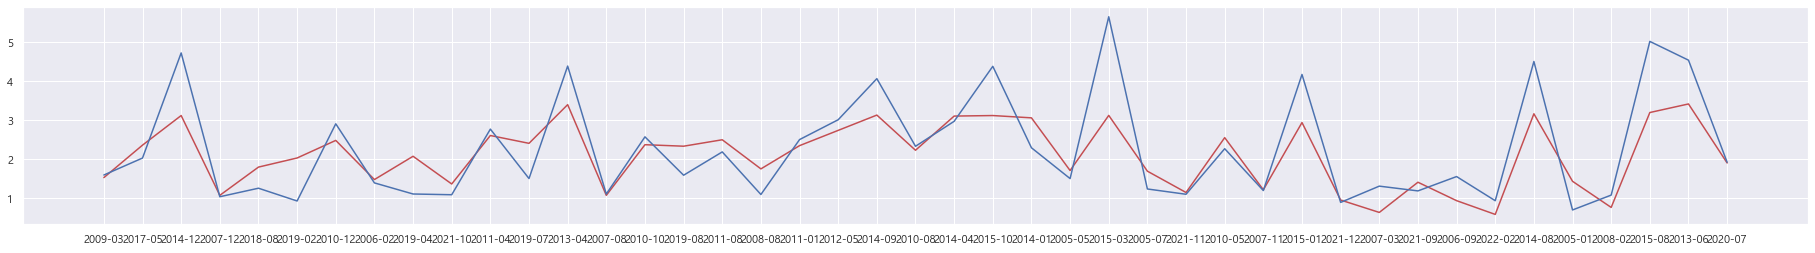

In [25]:
# 예측 그래프
## length -> 214 (60% 0~128, 20% 129~171, 20% 172~214)

## 변수 각각 요인 데이터
## feature_data_A : 금리 요인
## feature_data_B : 부동산 요인
## feature_data_C : 거시경제 요인

## 변수 합한 요인 데이터
## feature_data2_A : 금리 요인
## feature_data2_B : 금리 + 부동산 요인
## feature_data2_C : 금리 + 부동산 + 거시경제 요인

## 모델 : Ridge, Lasso, ElasticNet

x_train, x_test, y_train, y_test = train_test_split(feature_data, target, test_size=0.2, random_state=25)

p_model = Ridge(alpha=1.0, random_state=25)
p_model.fit(x_train, y_train)
p_pred = p_model.predict(x_test)

plt.figure(figsize=(32,4))
plt.plot(p_pred, c='r')
#plt.plot(y_train)
plt.plot(y_test)
plt.show()

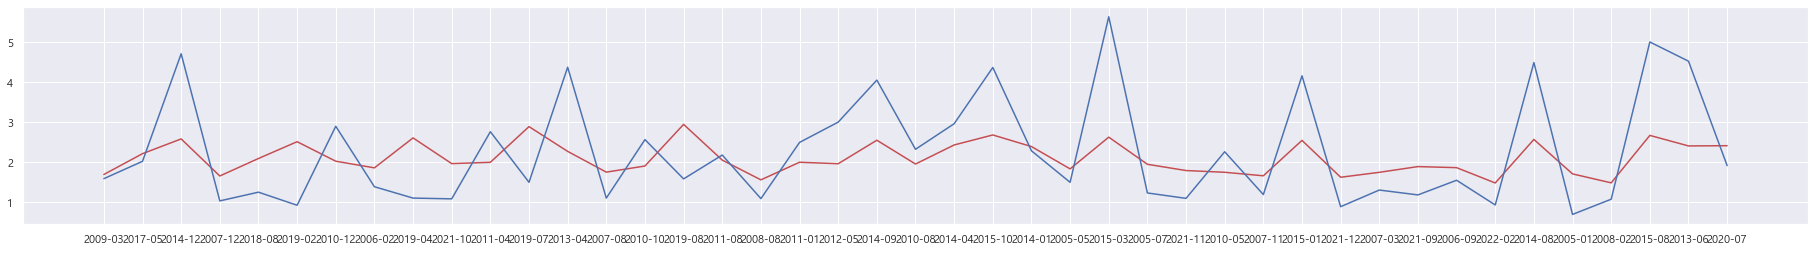

In [26]:
## 모델 : Ridge, Lasso, ElasticNet
x_train, x_test, y_train, y_test = train_test_split(feature_data_A, target, test_size=0.2, random_state=25)

p_model = Ridge(alpha=1.0, random_state=25)
p_model.fit(x_train, y_train)
p_pred = p_model.predict(x_test)

plt.figure(figsize=(32,4))
plt.plot(p_pred, c='r')
#plt.plot(y_train)
plt.plot(y_test)
plt.show()

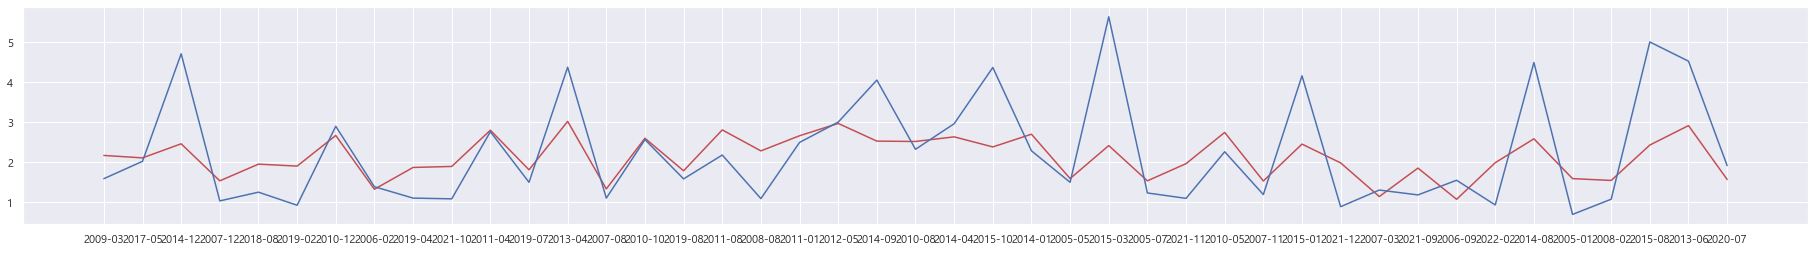

In [27]:
## 모델 : Ridge, Lasso, ElasticNet
x_train, x_test, y_train, y_test = train_test_split(feature_data_B, target, test_size=0.2, random_state=25)

p_model = Ridge(alpha=1.0, random_state=25)
p_model.fit(x_train, y_train)
p_pred = p_model.predict(x_test)

plt.figure(figsize=(32,4))
plt.plot(p_pred, c='r')
#plt.plot(y_train)
plt.plot(y_test)
plt.show()

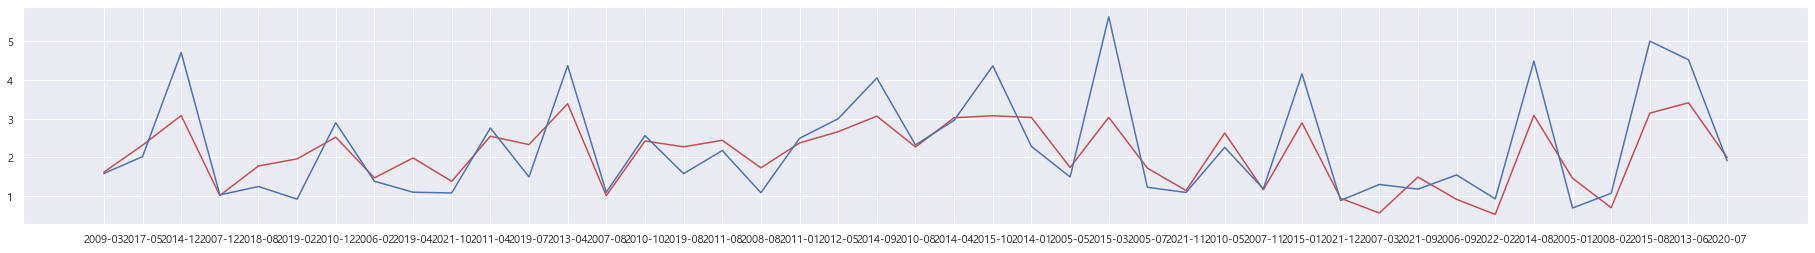

In [34]:
## 모델 : Ridge, Lasso, ElasticNet
x_train, x_test, y_train, y_test = train_test_split(feature_data2_C, target, test_size=0.2, random_state=25)

p_model = Ridge(alpha=1.0, random_state=25)
p_model.fit(x_train, y_train)
p_pred = p_model.predict(x_test)

plt.figure(figsize=(32,4))
plt.plot(p_pred, c='r')
#plt.plot(y_train)
plt.plot(y_test)
plt.show()

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("정확도:", accuracy_score(y_test, p_pred))
print("정밀도:", precision_score(y_test, p_pred))
print("재현율:", recall_score(y_test, p_pred))

ValueError: continuous is not supported

In [ ]:
# 최적의 알파값을 찾기 전에 피처링 타겟 설정
mm_result3 = mm_result.copy()

## ALL
feature_data3 = mm_result2

## 가중평균발행금리 요인 
feature_data3_A = mm_result2[['가중평균발행금리']]

## '예금은행 대출금리' 요인
feature_data3_B = mm_result2[['예금은행 대출금리']]

## CD금리 요인
feature_data3_C = mm_result2[['가중평균발행금리', '예금은행 대출금리']]

target = data_a['만기전상환율']

## 주요 요인 별로 나눈 이유 -> 각 상관관계가 너무 높아서

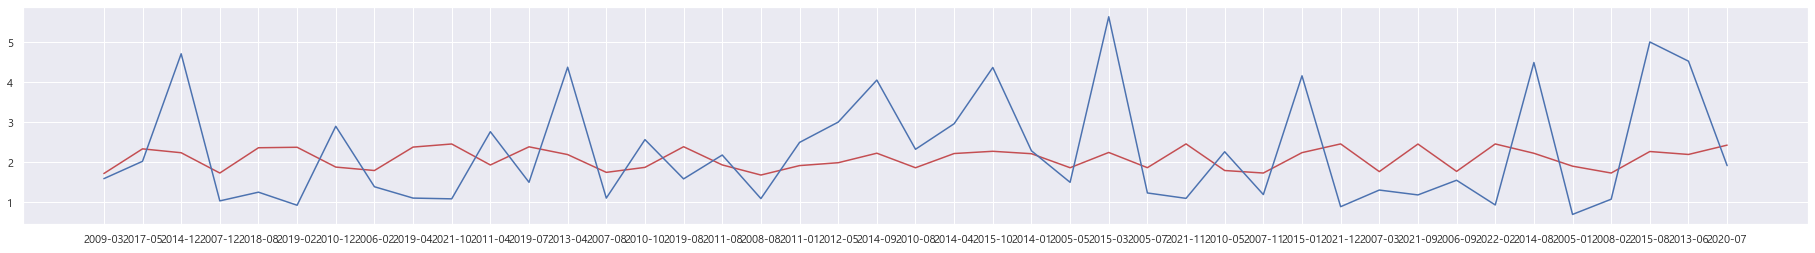

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature_data3_A, target, test_size=0.2, random_state=25)

p_model = Ridge(alpha=1.0, random_state=25)
p_model.fit(x_train, y_train)
p_pred = p_model.predict(x_test)

plt.figure(figsize=(32,4))
plt.plot(p_pred, c='r')
#plt.plot(y_train)
plt.plot(y_test)
plt.show()

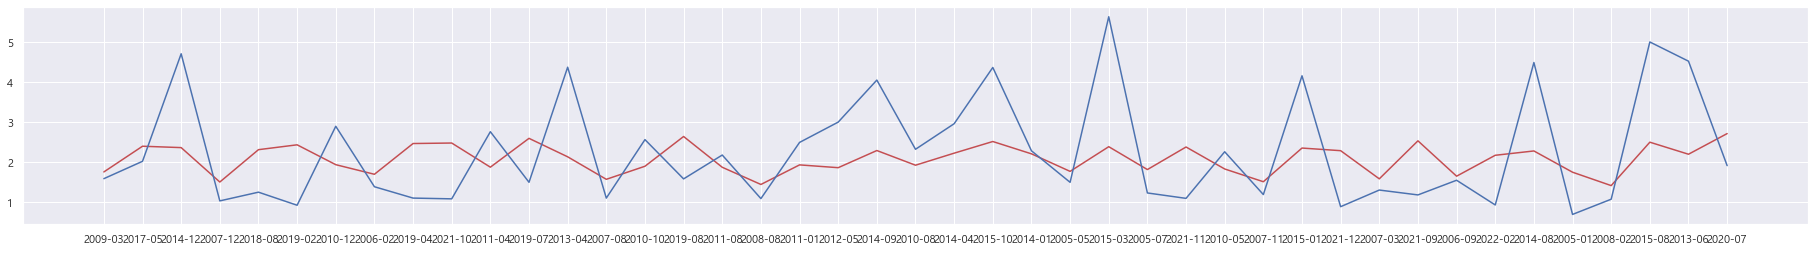

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature_data3_B, target, test_size=0.2, random_state=25)

p_model = Ridge(alpha=1.0, random_state=25)
p_model.fit(x_train, y_train)
p_pred = p_model.predict(x_test)

plt.figure(figsize=(32,4))
plt.plot(p_pred, c='r')
#plt.plot(y_train)
plt.plot(y_test)
plt.show()

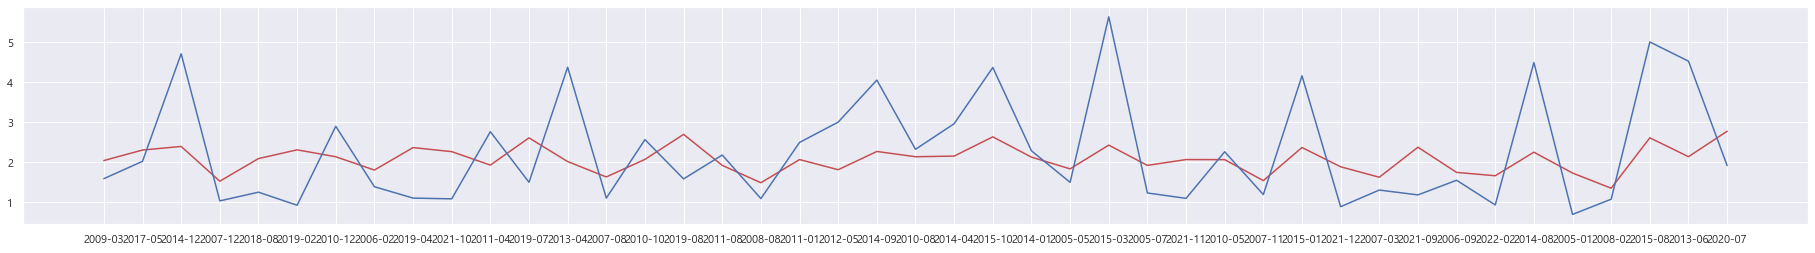

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(feature_data3_C, target, test_size=0.2, random_state=25)

p_model = Ridge(alpha=1.0, random_state=25)
p_model.fit(x_train, y_train)
p_pred = p_model.predict(x_test)

plt.figure(figsize=(32,4))
plt.plot(p_pred, c='r')
#plt.plot(y_train)
plt.plot(y_test)
plt.show()

## 코드 중복된거 -> 함수 다시 만들기
## 들어가는 피쳐들 개별적 쓰지 말고 리스트 정리
## 그래프 이쁘게 하자
## 